### Import modual for analysis

In [364]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import random

### Load the whole data 

Parse the data with ',' while importing the data and disignate the type as string,
because of the first row which is the column names are all string, to avoid the later TypeError

In [365]:
# load the whole dataset 
kickstarter = np.loadtxt('kickstarter.csv',delimiter=',',
                         dtype ='str',skiprows=1)

# transpose the data so that each row can be displayes by each index whithin the array
kickstarter_t = kickstarter.T


### Display descriptive statistics 
Total numbers of projects can be achieved by using the shape attribute and index for the first element, which indicates how many rows(projects) are in the dataset



First load the pledge data which currency is 'USD', and caculate the min, max, median and standard deviation for 'pledged' column and 'currency' column.

Use the transposed data to extract the plege data and perform the calculation of the the min, max, median and standard deviation.

In [366]:
# identified each columns names for later analysis reference by slicing only for the first row
columns_name = np.loadtxt('HW3_kickstarter.csv',delimiter=',',
                         dtype ='str')[0]

pledged = kickstarter_t[3].astype('float')

# utilize boolean indexing to get the USD currency in pledged data
pledged_USD = pledged[kickstarter_t[6]=='USD'].astype('float') 

# the amount pledged (in U.S. dollars) data across all projects
pledged_USD


array([ 321.  , 4431.12, 2500.  , ...,    0.  ,   50.  ,  155.  ])

Use numpy statistics method to calcualte min, max, mean, median, and standard deviation

In [367]:
# Total number of projects get be retrieved by passing the shape attribute and only get the row number
# print out the answer 2(a)
print(f'Total number of projects : {kickstarter.shape[0]}' )

Total number of projects : 4184


In [368]:
# sum
print(f'sum = {np.sum(pledged_USD)}')

# min
print(f'min = {np.min(pledged_USD)}')

# max
print(f'max = {np.max(pledged_USD)}')

# median
print(f'median = {np.median(pledged_USD)}')

# standard deviation
print(f'standard deviation = {np.std(pledged_USD)}')

sum = 4293556.62
min = 0.0
max = 111111.77
median = 107.0
standard deviation = 5138.333983978143


#### Percentage of projects that earned total pledges of at least 2,500
To get the percentage of the pledge over $2500, use it to be devided by the total number of the projects.

In [369]:
# first get the total number of projects to calculate percentage
total_number_of_projects = len(pledged)

# sum the boolean array of the pledged which are over $2500

total_pledges_at_least = 2500

# sum the bolean array to get the number of projects which fit the criteria 
atleast_2500 = np.sum(pledged_USD >= total_pledges_at_least)

# calculate the percentage 
percentage_at_least_2500 = atleast_2500/total_number_of_projects

# print out the answer 2(c)
print(f'Percentage of projects that earned total pledges of at least $2,500 is: {percentage_at_least_2500*100:.2f}%')


Percentage of projects that earned total pledges of at least $2,500 is: 9.11%


In [370]:
# load the category data by fetching the second last rows of the kickstarter_t data
category_data = kickstarter_t[-2]
category_data

array(['Conceptual Art', 'Conceptual Art', 'Conceptual Art', ...,
       'Painting', 'Painting', 'Painting'], dtype='<U67')

In [371]:
# unzip the output from np.unique function to get the counts number of each unique category 
# and name of each unique category
unique, counts = np.unique(category_data, return_counts=True)

# transpose the unzip data to get a better view and easier to analyze further
category_data_T = np.asarray((unique, counts)).T

#print out the counts of number of each category
category_data_T

array([['Ceramics', '204'],
       ['Conceptual Art', '879'],
       ['Digital Art', '1054'],
       ['Illustration', '461'],
       ['Painting', '1586']], dtype='<U67')

#### Calculate percentage for each category

First get the number of total category and use for loop five times because there are five category. Inside the for loop, first count the numbers of the category then apply the number to caluculate percentage of each. 

In [372]:
# sum the counts of category in the second column to get the total projects counts
sum_total = sum(category_data_T[:,1].astype(int))

# initialize a list object for later storage percentage data
category_percentage_list=[]

# there are five categories ready to be calculated for percentage, so set a for loop for 5 times
for i in np.arange(5):
    
    # get the number of counts for each category
    count = category_data_T[i,1].astype(int)
    
    # calculate the percnetage to the second decimal
    percentage = count/sum_total*100
    percentage = "{:.2f}".format(percentage)
    
    # append the percentage data to the empty list initiated at first to use it for later analysis
    category_percentage_list.append(percentage)
    print(f'the percentage of {category[i]} : {percentage}%')
    
# tranform the category_percentage_list to array 
category_percentage_list_arr = np.asarray(category_percentage_list)

# change the type to float so the data can be plot properly
category_percentage_list_arr = category_percentage_list_arr.astype(float)

the percentage of Conceptual Art : 4.88%
the percentage of Conceptual Art : 21.01%
the percentage of Conceptual Art : 25.19%
the percentage of Conceptual Art : 11.02%
the percentage of Conceptual Art : 37.91%


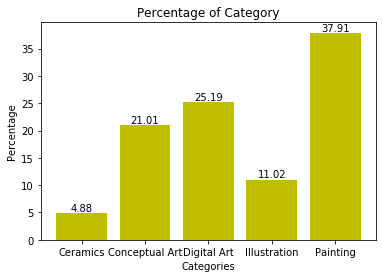

In [373]:
# plot the categay and the responding percentage for each category, and label the x,y axis
plt.bar(hstack_category_T[0],arr,color='y')
plt.title ('Percentage of Category')
plt.xlabel('Categories')
plt.ylabel('Percentage')

# label percentage on each bar
for i in range(len(hstack_category_T[0])):
    plt.annotate(str(arr[i]), xy=(hstack_category_T[0][i],arr[i]), ha='center', va='bottom')

From the above bar plot, we can infer that:
    1. Illustration category is in the last two projects counts, howerever, its' percentagelots pattrative category to receive the most funding no matter in the counts 
    of projects or looking at the percentage data.
    2. The ceramics category which has the lowest funding fell short from the paiting   category for up to 33%, which was a huge gap between the highest data and the lowest  data.

#### Load the project states data

In [374]:
state_data = kickstarter_t[4]
state_data_with_category = kickstarter_t[[-2,4]]
state_data_with_category_t = state_data_with_category.T
state_data_with_category_t
category = state_data_with_category_t[:,0]


Display a bar for each project category and the percentage of projects that were successful to know which project will mostly succeed. 

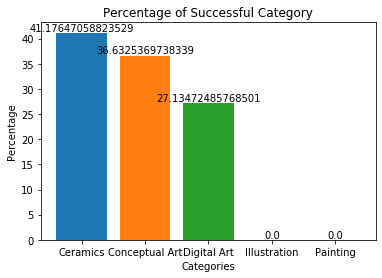

In [375]:
# initialize the percentage_list to store percentage data for each category later
percentage_list=[ ]

# get the category of each projects
category_list = category_data_T[:,0]

for i in category_list: 
    # count the numbers for each category 
    unique, counts = np.unique(state_data_with_category_t[category==i],return_counts=True)
    state_for_category = np.asarray((unique, counts)).T
    
    # only retreive the state data
    state_for_category = state_for_category[1:]
    
    count_state_category = dict(state_for_category)
    
    # turn the np.array to dictionary, 
    # so in the for loop the corresponding numbers of counts can be achieved by using .keys()
    for j in count_state_category.keys():
        count_state_category[j]=count_state_category[j].astype(int)
    
    successful = count_state_category.get('successful',0)
    
    # get the data for successful category
    total_case = len(state_data_with_category_t[state_data_with_category_t==i])
    
    # calculate the successful percentage on each category 
    percentage_of_categary_state = successful/total_case*100


    # add percentage of each category to the initialized list to pass this object to the bar plot
    percentage_list.append(percentage_of_categary_state)
    
    # plot the data with category for X axis and percnetage for Y axis
    plt.bar(i,percentage_of_categary_state)
    plt.title ('Percentage of Successful Category')
    plt.xlabel('Categories')
    plt.ylabel('Percentage')
    plt.annotate(str(percentage_of_categary_state), xy=(i,percentage_of_categary_state), ha='center', va='bottom')

    
plt.show()




From the bar chart showing above, we can know that Ceramics category have the highest successful percetnage. Illustration and Paiting category both have zero successful projects.

In [376]:
# Load the staff pick and spotlight data.
staff_spotlight = kickstarter_t[[-6,-1,4]]
staff_spotlight

array([['FALSE', 'FALSE', 'FALSE', ..., 'FALSE', 'FALSE', 'FALSE'],
       ['TRUE', 'TRUE', 'TRUE', ..., 'FALSE', 'FALSE', 'FALSE'],
       ['successful', 'successful', 'successful', ..., 'failed',
        'failed', 'failed']], dtype='<U67')

In [377]:
# identified all of staff picked or not projects and their state
success_staff = staff_spotlight[[0,2]]
success_staff = success_staff.T


In [378]:
# get the staff pick or not data 
staff = staff_spotlight[0]

# ge tht spotlight or not data
spotlight = staff_spotlight[1]

# count the number for staff pick and non staff pick projects
unique_staff, counts_staff = np.unique(staff, return_counts=True)
unique_staff_T = np.asarray((unique_staff, counts_staff)).T

# get the count of numbers for "TRUE"
number_staff_pick = unique_staff_T[1,1]

# print out the answer
print(f' the total number of projects identified as staff picks : {number_staff_pick}')

 the total number of projects identified as staff picks : 224


In [379]:
# count the number for spotlight and non spotlight projects
unique_spotlight, counts_spotlight = np.unique(spotlight, return_counts=True)

# transpose the data to make it easier to understand the data
unique_spotlight_T = np.asarray((unique_spotlight, counts_spotlight)).T

# get the count of numbers for "TRUE"
number_spotlight = unique_spotlight_T[1,1]

# print out the answer
print(f' the total number of spotlight projects : {number_spotlight}')

 the total number of spotlight projects : 692


In [380]:
# set up the filter object for the successful project
fltr = np.asarray(['successful'])

# pass in the fltr object in np.in1d() to get only the successful project
success_staff1 = success_staff[np.in1d(success_staff[:, 1], fltr)]


In [381]:
# set up the second filter object for the hand picked project
fltr2 = np.asarray(['TRUE'])

# pass in the fltr2 object in np.in1d() to get only the staff pick project
success_staff2 = success_staff1[np.in1d(success_staff1[:, 0], fltr2)]

# print out the successful projects which were staff picked
print(f'the success rate (percentage) of staff pick: {len(success_staff2)/len(success_staff1)*100:.3f}%')

the success rate (percentage) of staff pick: 23.555%


In [382]:
# identified all of spotlight or not projects and their state
success_spotlight = staff_spotlight[[1,2]]
success_spotlight = success_spotlight.T

In [383]:
# set up the filter object for successful project
fltr3 = np.asarray(['successful'])

# pass in the fltr2 object in np.in1d() to get only the successful project
success_spotlight = success_spotlight[np.in1d(success_spotlight[:, 1], fltr3)]

In [384]:
# created the filter object for filtering out only spotlight project
fltr4 = np.asarray(['TRUE'])

# filter out the spotlight projects by passing the fltr4 to np.in1d()
success_spotlight = success_spotlight[np.in1d(success_spotlight[:, 0], fltr4)]

# print out the successful projects which were spotlight projects
print(f'the success rate (percentage) of spotlight projects: {len(success_spotlight)/len(success_spotlight)*100}%')

the success rate (percentage) of spotlight projects: 100.0%


From the above analysis, the potlight projects have the 100% success percentage! 
The reason that spotlight projects can own 100% successful rate may be that because the projects which receive more attention get the chance to grow better. Second, the criteria of staff pick may vary from one staff to another, the quality of the staff pick category can be difficult to retain its quality compared to spotlight projects.

I'll then plot the total number of success projects from each currency. We can see that the projects received funding in the form of US dollars have the largest counts among the other currecy, further more, there are no successful projects for two of the currency("NOK" and "NZD"). Therefore, we can infer that maybe next time should reduce the spending on the funding campaign on those two country.

In [385]:
# first stack the state data and currency data 
currency_state = np.vstack((kickstarter_t[6],state_data))

# get the currency data
currency = currency_state[0]

# get the state data 
state_for_currency = currency_state[1].T


In [386]:
# count the numbers for each currency and store it as a numpy array
currency_state_unique, currency_state_counts = np.unique(currency, return_counts=True)
currency_state = np.asarray((currency_state_unique, currency_state_counts))
currency_state_count = currency_state.T
currency_state_count

array([['AUD', '79'],
       ['CAD', '190'],
       ['CHF', '6'],
       ['DKK', '15'],
       ['EUR', '153'],
       ['GBP', '371'],
       ['NOK', '6'],
       ['NZD', '5'],
       ['SEK', '23'],
       ['USD', '3336']], dtype='<U67')

In [387]:
# filter out the currency of each successful project
success_for_currency = currency[state_for_currency=='successful']

Text(0.5, 1.0, 'Count of Currency of Successful projects')

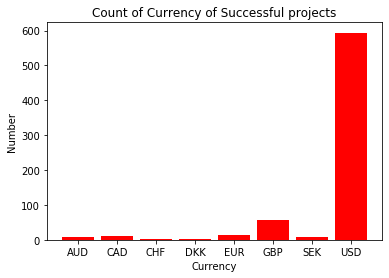

In [388]:
# count the numbers for each currency for successful projects
currency_success, currency_success_count = np.unique(success_for_currency, return_counts=True)
currency_success_arr = np.asarray((currency_success, currency_state_counts))

# plot the data in a bar plot
plt.bar(currency_success, currency_success_count, color = 'r')
plt.xlabel('Currency')
plt.ylabel('Number')
plt.title('Count of Currency of Successful projects')